# Import"

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

###Set up github

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/INTERN/SATRIA DATA/Resource/'
%pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/INTERN/SATRIA DATA


'/content/drive/MyDrive/INTERN/SATRIA DATA'

In [8]:
%cd 'BDC Satria Data 2022'

/content/drive/.shortcut-targets-by-id/1fkBz1-vepGPpSi3G1lqK0rs31ptk6fNB/BDC Satria Data 2022


In [ ]:
# !git init

Reinitialized existing Git repository in /content/drive/MyDrive/INTERN/SATRIA DATA/.git/


In [ ]:
# !git config --global user.email "rhmftn.ni@gmail.com"
# !git config --global user.name "rahmafatin"

In [ ]:
# !git commit -m "checking the null value"

On branch master

Initial commit

Untracked files:
	Hasil Training Model.gsheet
	Instruksi dan Problem BDC Satria Data 2022.pptx
	Kode ICD10 untuk diagnosis FKTP.xlsx
	Metadata.xlsx
	model.ipynb
	submission.csv
	test_fktp.txt
	train_fktp.txt

nothing added to commit but untracked files present


# Preprocessing

In [9]:
cols = [
    'nomor_peserta', 
    'nomor_keluarga', 
    'bobot', 
    'id_kunjungan_fktp', 
    'tgl_dtg_kunjungan_fktp', 
    'tgl_plg_kunjungan_fktp', 
    'provinsi_fktp', 
    'kota_fktp', 
    'kepemilikan_fktp', 
    'jenis_fktp', 
    'tipe_fktp', 
    'tingkat_pelayanan_fktp', 
    'jenis_poli_fktp', 
    'akses_layanan_fktp', 
    'kode_nama_diagnosis', 
    'kode_diagnosis', 
    'kode_diagnosis_2', 
    'nama_diagnosis', 
    'provinsi_rujukan', 
    'kota_rujukan', 
    'kepemilikan_faskes_rujukan', 
    'jenis_faskes_rujukan', 
    'tipe_faskes_rujukan', 
    'poli_faskes_rujukan', 
    'jenis_kunjungan_fktp', 
    'status_pulang',
]

In [10]:
df_train = pd.read_csv("train_fktp.txt", sep=',', header=None, names=cols)
df_train.head()

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp,status_pulang
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat


In [ ]:
#Checking the null value distribution 
df_train.isna().sum()


nomor_peserta                       0
nomor_keluarga                      0
bobot                               0
id_kunjungan_fktp                   0
tgl_dtg_kunjungan_fktp              0
tgl_plg_kunjungan_fktp              0
provinsi_fktp                       0
kota_fktp                           0
kepemilikan_fktp                    0
jenis_fktp                          0
tipe_fktp                           0
tingkat_pelayanan_fktp              0
jenis_poli_fktp                     1
akses_layanan_fktp                  0
kode_nama_diagnosis                 0
kode_diagnosis                1380241
kode_diagnosis_2                    0
nama_diagnosis                      0
provinsi_rujukan                    0
kota_rujukan                        0
kepemilikan_faskes_rujukan          0
jenis_faskes_rujukan                0
tipe_faskes_rujukan                 0
poli_faskes_rujukan                 0
jenis_kunjungan_fktp                0
status_pulang                       0
dtype: int64

###Exploratory Data Analysis

Melihat persebaran data untuk mencegah persebaran data yang tidak normal. sehingga menyebabkan tidak akuratnya prediksi

In [ ]:
df_train['status_pulang'].value_counts()

Belum_Sehat    2634511
Sehat          1422387
Name: status_pulang, dtype: int64

Untuk persebaran dari kepulangan pasien cukup seimbang. tetapi jika ditilik kembali terdapat angka yang cukup besar untuk null value di kolom kode_diagnosis

In [11]:
df_train[df_train['kode_diagnosis'].isna() == True]['status_pulang'].value_counts()

Sehat    1380241
Name: status_pulang, dtype: int64

Untuk data yang memiliki nilai kode_diagnosis null berperan besar terhadap kepulangan pasien. Sehingga penghapusan row tidak dapat dilakukan. Alternatif lain adalah melihat poli rujukan dari data dengan diagnosis null

In [12]:
df_train[df_train['kode_diagnosis'].isna() == True]['poli_faskes_rujukan'].value_counts()

98    1380241
Name: poli_faskes_rujukan, dtype: int64

Berdasarkan metadata nilai 98 --> tidak dirujuk. 
Dapat disimpulkan bahwa pasien yang tidak memiliki kode diagnosis tidak mendapatkan rujukan sehingga bisa di klasifikasikan sebagai sembuh. 

Selanjutnya kita bisa melihat poli yang didatangi pasien yang sebagian besar tidak memiliki rujukan dan tidak di diagnosis apapun

In [13]:
df_train[df_train['kode_diagnosis'].isna() == True]['jenis_poli_fktp'].value_counts()

13.0    860554
12.0    499703
28.0     13501
1.0       2077
18.0      1612
17.0      1465
20.0       716
19.0       414
21.0       146
3.0         29
2.0         12
14.0         5
7.0          4
5.0          2
Name: jenis_poli_fktp, dtype: int64

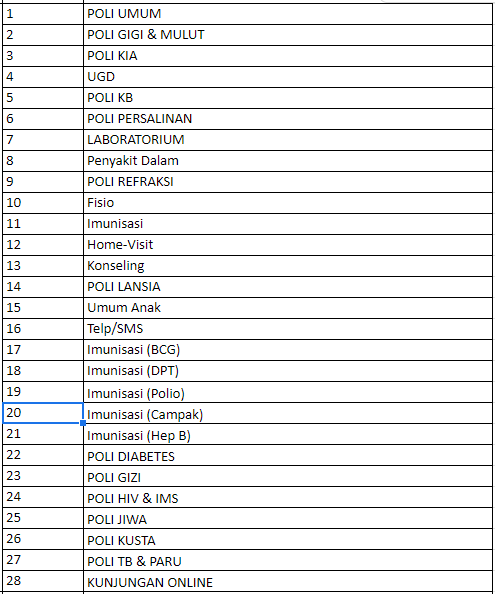


Berdasarkkan metadata menunjukkan bahwa poli - poli yang tidak melakukan rujukan adalah konseling, home visit, Kunjungan online, Poli umum, Imunisasi, Gigi, KIA, Lansia, Laborat dan KB 

Seluruh poli tersebut masuk kedalam poli rawat jalan sehingga tidak membutuhkan konsentrasi lebih lanjut. 

Karena kita tidak bisa menghapus baris yang memiliki null value. maka kita bisa mengisi null value tersebut dengan nilai kode_diagnosis_2 sehingga antara kode_diagnosis dan kode_diagnosis_2 memiliki value yang sama. Hal ini dilakukan karena untuk seluruh data yang memiliki kode_diagnosis null memiliki kode_diagnosis_2 sebesar 9999 Hal ini ditunjukkan di section Nama diagnosis dan kode diagnosis

####Filling missing value

In [14]:
# mengisi null value pada kolom kode diagnosis
df_train['kode_diagnosis'].fillna(value='9999', inplace=True)

# masih terdapat missing value dalam jenis_poli_fktp
# Karena hanya satu baris maka bisa menggunakan dropna 
df_train.dropna(axis=0, inplace=True)

In [15]:
df_train.isna().sum()

nomor_peserta                 0
nomor_keluarga                0
bobot                         0
id_kunjungan_fktp             0
tgl_dtg_kunjungan_fktp        0
tgl_plg_kunjungan_fktp        0
provinsi_fktp                 0
kota_fktp                     0
kepemilikan_fktp              0
jenis_fktp                    0
tipe_fktp                     0
tingkat_pelayanan_fktp        0
jenis_poli_fktp               0
akses_layanan_fktp            0
kode_nama_diagnosis           0
kode_diagnosis                0
kode_diagnosis_2              0
nama_diagnosis                0
provinsi_rujukan              0
kota_rujukan                  0
kepemilikan_faskes_rujukan    0
jenis_faskes_rujukan          0
tipe_faskes_rujukan           0
poli_faskes_rujukan           0
jenis_kunjungan_fktp          0
status_pulang                 0
dtype: int64

In [16]:
df_train.columns

Index(['nomor_peserta', 'nomor_keluarga', 'bobot', 'id_kunjungan_fktp',
       'tgl_dtg_kunjungan_fktp', 'tgl_plg_kunjungan_fktp', 'provinsi_fktp',
       'kota_fktp', 'kepemilikan_fktp', 'jenis_fktp', 'tipe_fktp',
       'tingkat_pelayanan_fktp', 'jenis_poli_fktp', 'akses_layanan_fktp',
       'kode_nama_diagnosis', 'kode_diagnosis', 'kode_diagnosis_2',
       'nama_diagnosis', 'provinsi_rujukan', 'kota_rujukan',
       'kepemilikan_faskes_rujukan', 'jenis_faskes_rujukan',
       'tipe_faskes_rujukan', 'poli_faskes_rujukan', 'jenis_kunjungan_fktp',
       'status_pulang'],
      dtype='object')

####Nama diagnosis dan kode diagnosis

In [17]:
df_train[df_train['kode_diagnosis'].isna() == True][['kode_nama_diagnosis', 'kode_diagnosis_2', 'nama_diagnosis']]

,kode_nama_diagnosis,kode_diagnosis_2,nama_diagnosis


In [18]:
df_train[df_train['kode_diagnosis'].isna() == True]['kode_diagnosis_2'].unique()

array([], dtype=object)

In [19]:
kode_nama = pd.DataFrame(df_train[['kode_diagnosis', 'nama_diagnosis']])

In [20]:
kode_nama['nama_diagnosis'].str.split(',').str.get(0).unique()

array(['9999', 'Gastritis', 'Contraceptive management', ...,
       'Intentional self-poisoning by and exposure to nonopioid analgesics',
       'Falling', 'Parageusia'], dtype=object)

In [21]:
kode_nama[kode_nama['nama_diagnosis'].str.contains('Exposure')]['kode_diagnosis'].unique()

array(['X59', 'W49', 'X58', 'X00', 'X31', 'W87', 'W85', 'W89', 'W43',
       'X09', 'W91', 'X39', 'W99', 'W64', 'Z58', 'X04', 'X08', 'X06'],
      dtype=object)

####Visualisasi

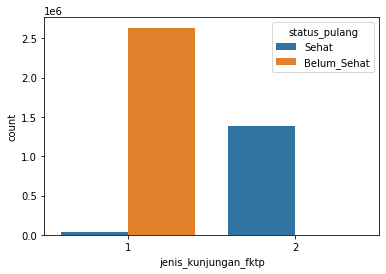

In [22]:
sns.countplot(x='jenis_kunjungan_fktp' ,hue='status_pulang', data=df_train)
#Jenis kunjungan

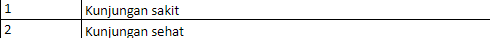

Sebagian besar pasien yang melakukan kunjungan sakit memiliki status belum sehat. begitupula sebaliknya

In [23]:
df_train['kepemilikan_faskes_rujukan'].value_counts()

98    3677527
9      208800
3      117312
2       16614
5       13834
4        8464
8        7550
7        2329
1        2244
6        2223
Name: kepemilikan_faskes_rujukan, dtype: int64

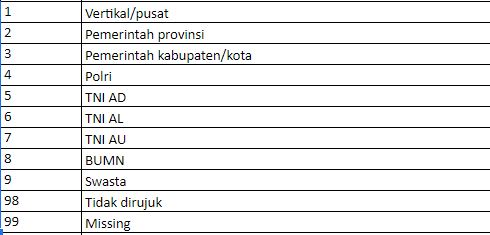

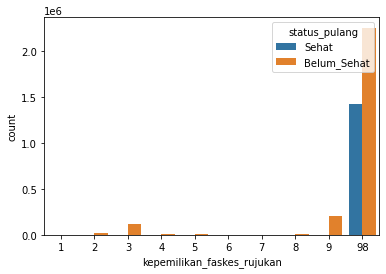

In [24]:
sns.countplot(x='kepemilikan_faskes_rujukan' ,hue='status_pulang', data=df_train)

In [25]:
df_train['jenis_faskes_rujukan'].value_counts()

98    3677527
1      368251
2       11119
Name: jenis_faskes_rujukan, dtype: int64

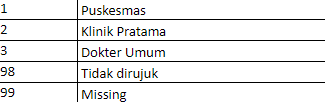

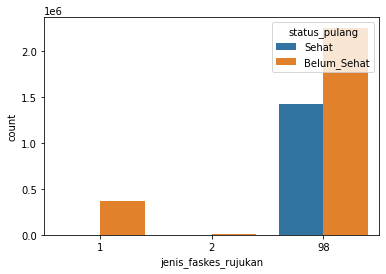

In [26]:
sns.countplot(x='jenis_faskes_rujukan' ,hue='status_pulang', data=df_train)

Dari beberapa kolom yang sudah diamati. kita bisa melihat korelasi antar seluruh kolom terhadap class menggunakan correlation matrix dan kemudian di visualisasikan menggunakan heatmap. 

##Feature Selection

In [13]:
# Encode status pulang sesuai dengan ketentuan
df_train['status_pulang'] = df_train['status_pulang'].replace(['Sehat', 'Belum_Sehat'], [1,0])

In [27]:
# label_enc = LabelEncoder()

# df_train.status_pulang = label_enc.fit_transform(df_train.status_pulang)
# df_train.head()

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp,status_pulang
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,1
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,0
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,0
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,0
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,0


In [28]:
#Pemilihan feature secara manual

columns = ['provinsi_fktp',
       'kota_fktp', 
       'kepemilikan_fktp', 
       'jenis_fktp', 'tipe_fktp',
       'tingkat_pelayanan_fktp', 
       'jenis_poli_fktp', 
       'akses_layanan_fktp',
       'kode_nama_diagnosis', 
       'kode_diagnosis', 
       'kode_diagnosis_2',
       'provinsi_rujukan', 
       'kota_rujukan',
       'kepemilikan_faskes_rujukan', 
       'jenis_faskes_rujukan',
       'tipe_faskes_rujukan', 
       'poli_faskes_rujukan', 
       'jenis_kunjungan_fktp',
       'status_pulang']

In [29]:
df = pd.DataFrame(df_train[columns])

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056897 entries, 0 to 4056897
Data columns (total 26 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   nomor_peserta               float64
 1   nomor_keluarga              int64  
 2   bobot                       float64
 3   id_kunjungan_fktp           object 
 4   tgl_dtg_kunjungan_fktp      object 
 5   tgl_plg_kunjungan_fktp      object 
 6   provinsi_fktp               int64  
 7   kota_fktp                   int64  
 8   kepemilikan_fktp            int64  
 9   jenis_fktp                  int64  
 10  tipe_fktp                   int64  
 11  tingkat_pelayanan_fktp      int64  
 12  jenis_poli_fktp             float64
 13  akses_layanan_fktp          int64  
 14  kode_nama_diagnosis         int64  
 15  kode_diagnosis              object 
 16  kode_diagnosis_2            object 
 17  nama_diagnosis              object 
 18  provinsi_rujukan            int64  
 19  kota_rujukan         

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056897 entries, 0 to 4056897
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   provinsi_fktp               int64  
 1   kota_fktp                   int64  
 2   kepemilikan_fktp            int64  
 3   jenis_fktp                  int64  
 4   tipe_fktp                   int64  
 5   tingkat_pelayanan_fktp      int64  
 6   jenis_poli_fktp             float64
 7   akses_layanan_fktp          int64  
 8   kode_nama_diagnosis         int64  
 9   kode_diagnosis              object 
 10  kode_diagnosis_2            object 
 11  provinsi_rujukan            int64  
 12  kota_rujukan                int64  
 13  kepemilikan_faskes_rujukan  int64  
 14  jenis_faskes_rujukan        int64  
 15  tipe_faskes_rujukan         int64  
 16  poli_faskes_rujukan         int64  
 17  jenis_kunjungan_fktp        int64  
 18  status_pulang               int64  
dtypes: float64(1), int64(

Create a correlation matrix to measure the correlation between the all variables. 
Note that correlation matrix just work perfectly on numerical data

In [32]:
#Encode kode_diagnosis 

oe = OrdinalEncoder()
oe.fit(df[['kode_diagnosis', 'kode_diagnosis_2']])
df[['kode_diagnosis', 'kode_diagnosis_2']] = oe.transform(df[['kode_diagnosis', 'kode_diagnosis_2']])

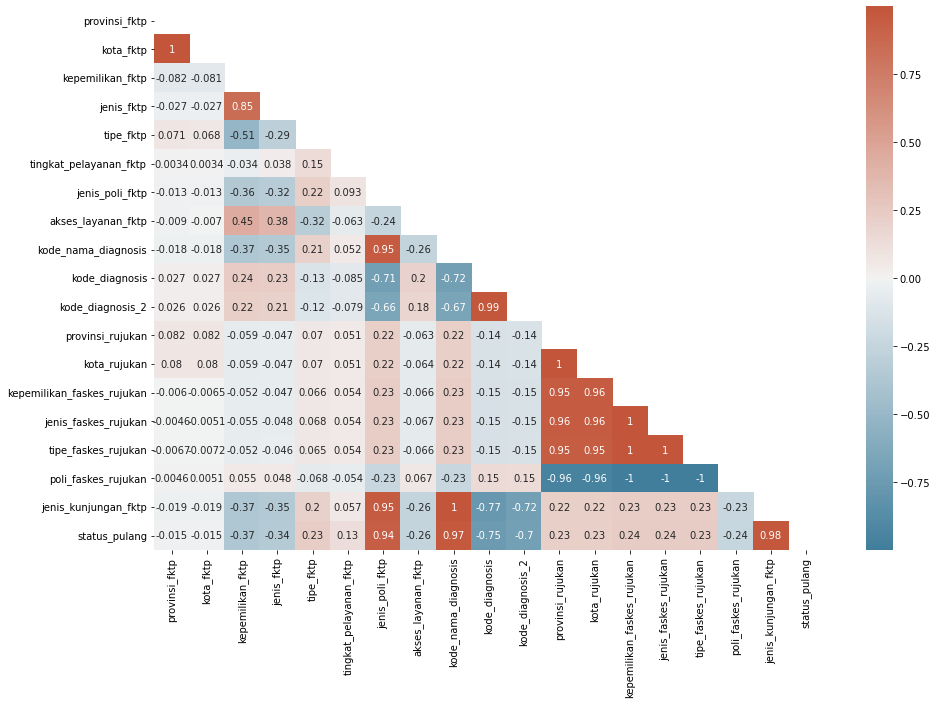

In [33]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(15, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Dari heatmapp correlation diatas dapat disimpulkan bahwa fitur yang memiliki korelasi paling tinggi terhadap status_pulang adalah jenis_poli_fktp, kode_nama_diagnosis dan jenis_kunjungan_fktp. 

Tetapi kita bisa menggunakan fitur yang memiliki korelasi positif terhadap status pulang. 
1. tipe_fktp
2. tingkat_pelayanan_fktp
3. jenis_poli_fktp
4. kode_nama_diagnosis
5. provinsi_rujukan
6. kota_rujukan
7. kepemilikan_faskes_rujukan
8. jenis_faskes_rujukan
9. tipe_faskes_rujukan
10. jenis_kunjungan_fktp 

Tetapi terdapat beberapa fitur yang tidak masuk kedalam heatmap diatas. Sehingga kita bisa memanfaatkan feature selection dari library

In [34]:
corr_columns = ['tipe_fktp',
                'tingkat_pelayanan_fktp',
                'jenis_poli_fktp',
                'kode_nama_diagnosis',
                'provinsi_rujukan',
                'kota_rujukan',
                'kepemilikan_faskes_rujukan',
                'jenis_faskes_rujukan',
                'tipe_faskes_rujukan',
                'jenis_kunjungan_fktp']

In [35]:
# x_train = df_train.iloc[:, :-1]
# y_train = df_train.iloc[:, -1]

#Manually Feature Schema (All Feature not including date, id and name (18/25 Columns))
# X_train = df.iloc[:,:-1]
# y_train = df.iloc[: ,-1]

#Correlation Feature Schema (From 18/25 Columns choose columns having positive correlations)
X_train = df[corr_columns]
y_train = df.iloc[:,-1]

####Feature Selection

In [36]:
# fs = SelectKBest(score_func=chi2, k=5)
# fs.fit(X_train, y_train)

In [37]:
# featured_cols = fs.get_support(indices=True)
# X_train = X_train.iloc[:,featured_cols]

In [38]:
# selected_feature = X_train.columns
# selected_feature

###Train-Test Split from training dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.33, random_state=101)

# Model Benchmark

Example sklearn f1 score
```python
>>> from sklearn.metrics import f1_score
>>> y_true = [0, 1, 2, 0, 1, 2]
>>> y_pred = [0, 2, 1, 0, 0, 1]
>>> f1_score(y_true, y_pred, average='macro')
0.26...
>>> f1_score(y_true, y_pred, average='micro')
0.33...
>>> f1_score(y_true, y_pred, average='weighted')
0.26...
>>> f1_score(y_true, y_pred, average=None)
array([0.8, 0. , 0. ])
>>> y_true = [0, 0, 0, 0, 0, 0]
>>> y_pred = [0, 0, 0, 0, 0, 0]
>>> f1_score(y_true, y_pred, zero_division=1)
1.0...
>>> # multilabel classification
>>> y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
>>> y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
>>> f1_score(y_true, y_pred, average=None)
array([0.66666667, 1.        , 0.66666667])
```

####Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)

In [ ]:
f1_score(y_test, predicted, average='weighted')

####GaussianNB

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

####BernouliNB

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

####SVM

In [ ]:
# model = SVC()
# model.fit(x_train, y_train)
# predicted = model.predict(x_test)
# f1_score(y_test, predicted, average='weighted')

####RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

####KNeighborClassifier

In [ ]:
# model = KNeighborsClassifier(n_neighbors = 1)  
# model.fit(x_train, y_train)
# predicted = model.predict(x_test)
# f1_score(y_test, predicted, average='weighted')

####XGBClassifier

In [48]:
model = XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

0.9976222380903488

#Data test

In [49]:
df_test = pd.read_csv("test_fktp.txt", sep=',', header=None, names=cols[:-1])
df_test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2


In [50]:
df_test.isna().sum()

nomor_peserta                      0
nomor_keluarga                     0
bobot                              0
id_kunjungan_fktp                  0
tgl_dtg_kunjungan_fktp             0
tgl_plg_kunjungan_fktp             0
provinsi_fktp                      0
kota_fktp                          0
kepemilikan_fktp                   0
jenis_fktp                         0
tipe_fktp                          0
tingkat_pelayanan_fktp             0
jenis_poli_fktp                    0
akses_layanan_fktp                 0
kode_nama_diagnosis                0
kode_diagnosis                345912
kode_diagnosis_2                   0
nama_diagnosis                     0
provinsi_rujukan                   0
kota_rujukan                       0
kepemilikan_faskes_rujukan         0
jenis_faskes_rujukan               0
tipe_faskes_rujukan                0
poli_faskes_rujukan                0
jenis_kunjungan_fktp               0
dtype: int64

In [53]:
# mengisi null value pada kolom kode diagnosis
df_test['kode_diagnosis'].fillna(value='9999', inplace=True)

# Encode fitur 
# df_test[['kode_diagnosis', 'kode_diagnosis_2']] = oe.transform(df_test[['kode_diagnosis', 'kode_diagnosis_2']])

In [ ]:
x_test = df_test.loc[corr_columns]

x_test

# Export Result to CSV

In [ ]:
# TODO: bikin dataframe dengan cols: No, PSTV01, Predicted
df_result.to_csv('result.csv', encoding='utf-8', index=False)